In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import networkx as nx
import time

In [2]:
path = 'data/wiki-Vote.txt'
G = nx.read_edgelist(path, delimiter='\t', create_using=nx.DiGraph, nodetype=int)  
A = nx.linalg.graphmatrix.adjacency_matrix(G)
print(nx.info(G))

# plot matrix
#plt.spy(A,marker=',')
#plt.show()

Name: 
Type: DiGraph
Number of nodes: 7115
Number of edges: 103689
Average in degree:  14.5733
Average out degree:  14.5733


Elapsed time:  0.151102 seconds


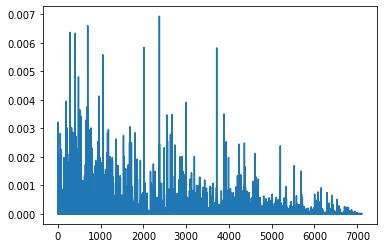

In [3]:
#compute PageRank algorith with power iteration (from network science)
def pageRank(M, t, iterations):
    N = M.shape[1]
    c = 0.85
    p = np.ones(N)/N

    for i in range(iterations):
        p = c * M * p + (1-c) * t #pagerank formula
        p = p/sum(p) #normalization

    return p


# dimension of the matrix
N = A.shape[0]

# for normal pagerank all nodes have the same teleport probability
# t = np.ones(N)/N 

# for local pagerank only a subset of nodes have non-negative probabilty
t = np.zeros(N)
t[3000] = 1

start = time.time()
p = pageRank(A, t, 40)
stop = time.time()
print('Elapsed time: ', str(stop-start)[0:8], 'seconds')
plt.plot(p)
plt.show()

In [15]:
def fastApproximatePageRank(G, target_node, alpha, epsilon):

    nodes = list(G.nodes())

    #pagerank
    p = {}
    for n in nodes:
        p[n] = 0

    #residuals
    r = {}
    for n in nodes:
        r[n] = 0
    r[target_node] = 1 * alpha
    r_vector = np.array(list(r.values()))

    #degrees
    d = {}
    for n in nodes:
        d[n] = G.out_degree(n)
    d_vector = np.array(list(d.values()))

    stopping_condition = r_vector >= epsilon * alpha * d_vector
    queue = np.array(nodes)[stopping_condition]
    #print(len(queue))
    valid_nodes = np.nonzero(d_vector)[0]

    while(any(stopping_condition)):
        u = queue[0]
        p[u] += r[u]
        m = (1-alpha) * r[u] / d_vector[valid_nodes][u]
        r[u] = 0
        for v in G.successors(u):
            r[v] += m
        r_vector = np.array(list(r.values()))
        stopping_condition = r_vector[valid_nodes] >= epsilon * alpha * d_vector[valid_nodes]
        queue = np.array(nodes)[valid_nodes][stopping_condition]

    p_vector = list(p.values())
    #print(p)

    # normalize pageRank vector
    P = sum(p_vector)
    p_vector = np.array(p_vector)/P

    return p_vector

In [16]:
start = time.time()
pg = fastApproximatePageRank(G, 3000, 0.85, 0.01)
stop = time.time()
print('Elapsed time:', str(stop-start)[0:8], 'seconds')
pg[np.argmax(pg)] = 0
plt.plot(pg)
plt.show()

IndexError: index 6424 is out of bounds for axis 0 with size 6110